In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib as mpl
import numpy as np
import scipy 
from math import sqrt 
from statistics import variance 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

#estimators
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR 
from sklearn import linear_model
from sklearn import tree

#model metrics 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score 

#cross validation 
from sklearn.model_selection import train_test_split

In [2]:
#data
rawData = pd.read_csv('C:/Users/heath/Documents/Data Class/Data Science with Python/Capstone/Capstone Data/Homes Sold In Cypress Fairbanks School District Last 6 Months.csv', header =0)
rawData.head()

,MLS Number,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,...,Room Count,Fireplaces Number,Stories,New Construction,New Construction Desc,Pool Private,No Of Garage Cap,Style,Last Change Timestamp,List Date
0,41751889,Single-Family,Sold,11022,Hanning,NaN,Houston,77041,Harris,85000,...,3,NaN,1.0,False,NaN,False,0,Traditional,6/13/2019 10:57,4/29/2019 0:00
1,13457599,Single-Family,Sold,18606,Lyford,NaN,Katy,77449,Harris,85000,...,5,1.0,1.0,False,NaN,False,1,Traditional,11/21/2019 17:14,9/24/2019 0:00
2,7785765,Single-Family,Sold,9202,Woodland Oaks,NaN,Houston,77040,Harris,90000,...,4,NaN,1.0,False,NaN,False,1,Traditional,8/2/2019 17:46,6/2/2019 0:00
3,53054343,Single-Family,Sold,4431,Prairie Meadow,NaN,Katy,77449,Harris,79999,...,4,1.0,1.0,False,NaN,False,1,Traditional,6/7/2019 22:15,5/14/2019 0:00
4,26407911,Single-Family,Sold,13210,Pebblewalk,NaN,Houston,77041,Harris,90000,...,7,1.0,1.0,False,NaN,False,0,Traditional,9/17/2019 2:53,8/9/2019 0:00


In [3]:
header = rawData.dtypes.index
print(header)

Index(['MLS Number', 'Property Type', 'Status', 'Street Number', 'Street Name',
       'Unit Number', 'City/Location', 'Zip Code', 'County', 'List Price',
       'Close Price', 'Close Date', 'Area', 'Subdivision',
       'Master Planned Community', 'Market Area', 'School District',
       'School Elementary', 'School Middle', 'School High', 'Sq Ft Total',
       'Price Sq Ft List', 'Price Sq Ft Sold', 'Lot Size', 'Acres',
       'Price Acre List', 'Price Acre Sales', 'Year Built', 'Bedrooms',
       'Baths Full', 'Baths Half', 'Baths Total', 'Room Count',
       'Fireplaces Number', 'Stories', 'New Construction',
       'New Construction Desc', 'Pool Private', 'No Of Garage Cap', 'Style',
       'Last Change Timestamp', 'List Date '],
      dtype='object')


In [4]:
#note different counts. Proably missing data 
#majority of data is import as object. Need to change 
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4405 entries, 0 to 4404
Data columns (total 42 columns):
MLS Number                  4405 non-null int64
Property Type               4405 non-null object
Status                      4405 non-null object
Street Number               4405 non-null int64
Street Name                 4405 non-null object
Unit Number                 4 non-null object
City/Location               4405 non-null object
Zip Code                    4405 non-null int64
County                      4405 non-null object
List Price                  4405 non-null int64
Close Price                 4405 non-null int64
Close Date                  4405 non-null object
Area                        4388 non-null float64
Subdivision                 4405 non-null object
Master Planned Community    1025 non-null object
Market Area                 4388 non-null object
School District             4405 non-null object
School Elementary           4383 non-null object
School Middle     

In [5]:
#Need to handle missing data
rawData.isnull().sum()

MLS Number                     0
Property Type                  0
Status                         0
Street Number                  0
Street Name                    0
Unit Number                 4401
City/Location                  0
Zip Code                       0
County                         0
List Price                     0
Close Price                    0
Close Date                     0
Area                          17
Subdivision                    0
Master Planned Community    3380
Market Area                   17
School District                0
School Elementary             22
School Middle                 12
School High                   12
Sq Ft Total                    1
Price Sq Ft List               1
Price Sq Ft Sold               1
Lot Size                     320
Acres                        675
Price Acre List              677
Price Acre Sales             677
Year Built                    32
Bedrooms                       0
Baths Full                     0
Baths Half

In [6]:
#Handling Missing Data

#too much missing data to be used
#Delete Columns: 'Unit Number', 'Master Planned Community', 'New Construction Desc',  
rawData2 = rawData.drop(['Unit Number', 'Master Planned Community', 'New Construction Desc'], axis=1)

#transform all land sizes into square feet then check for missing land measurement
rawData2['Lot Size'] = rawData2['Lot Size'].replace(np.NaN, rawData2['Acres'] * 43560 )

#Replace fireplace number blanks with zeros
rawData2['Fireplaces Number'] = rawData2['Fireplaces Number'].replace(np.NaN, 0 )
 
#deleting price per area columns as the correlation with the close/list price would be too strong 
#delete acres because there is no need two area attributes 
rawData2 = rawData2.drop(['Price Acre Sales', 'Price Acre List', 'Acres', 'Price Sq Ft List', 'Price Sq Ft Sold'], axis=1)

#Delete rows that contain missing data for columns that remain
rawData2 = rawData2.dropna(axis = 0, how ='any') 

#Need to handle missing data
rawData2.isnull().sum()

MLS Number               0
Property Type            0
Status                   0
Street Number            0
Street Name              0
City/Location            0
Zip Code                 0
County                   0
List Price               0
Close Price              0
Close Date               0
Area                     0
Subdivision              0
Market Area              0
School District          0
School Elementary        0
School Middle            0
School High              0
Sq Ft Total              0
Lot Size                 0
Year Built               0
Bedrooms                 0
Baths Full               0
Baths Half               0
Baths Total              0
Room Count               0
Fireplaces Number        0
Stories                  0
New Construction         0
Pool Private             0
No Of Garage Cap         0
Style                    0
Last Change Timestamp    0
List Date                0
dtype: int64

In [7]:
#Note attributes not showing up because of datatypes
#Note need to check variances of data
rawData2.describe()

,MLS Number,Street Number,Zip Code,List Price,Close Price,Area,Sq Ft Total,Lot Size,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,No Of Garage Cap
count,4.063000e+03,4063.000000,4063.000000,4.063000e+03,4.063000e+03,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000
mean,5.037073e+07,13275.725818,77264.484125,2.708079e+05,2.648910e+05,17.955206,2533.264583,9238.194339,1998.650751,3.670441,2.373616,0.568545,2.430470,8.596357,0.816638,1.922348,2.190992
std,2.806116e+07,4949.459316,181.109689,1.259259e+05,1.198993e+05,9.947447,879.608261,13174.925039,13.265547,0.694942,0.652015,0.535003,0.665361,2.931099,0.476528,23.607469,1.864422
min,2.752650e+05,3.000000,77040.000000,7.999900e+04,8.200000e+04,1.000000,796.000000,50.000000,1897.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.591726e+07,9119.000000,77070.000000,1.950000e+05,1.901000e+05,10.000000,1884.500000,6189.500000,1988.000000,3.000000,2.000000,0.000000,2.000000,7.000000,1.000000,1.000000,2.000000
50%,5.009063e+07,13622.000000,77429.000000,2.375000e+05,2.330000e+05,11.000000,2389.000000,7476.000000,2002.000000,4.000000,2.000000,1.000000,2.100000,9.000000,1.000000,2.000000,2.000000
75%,7.488570e+07,17022.500000,77433.000000,3.099000e+05,3.010000e+05,25.000000,3024.000000,9447.500000,2008.000000,4.000000,3.000000,1.000000,3.000000,10.000000,1.000000,2.000000,2.000000
max,9.898901e+07,27327.000000,77449.000000,2.150000e+06,1.900000e+06,35.000000,9241.000000,309431.000000,2019.000000,8.000000,8.000000,4.000000,8.100000,20.000000,4.000000,1506.000000,60.000000


In [8]:
#below data attributes need to be delete or transformed
datatype_objects = rawData2.select_dtypes(include=[object])
header_obj = datatype_objects.dtypes.index
print(header_obj)

Index(['Property Type', 'Status', 'Street Name', 'City/Location', 'County',
       'Close Date', 'Subdivision', 'Market Area', 'School District',
       'School Elementary', 'School Middle', 'School High', 'Style',
       'Last Change Timestamp', 'List Date '],
      dtype='object')


In [9]:
#Data transforation
#Change all object data type attributes

# all homes are in same school district, same property type, and status. Can be removed 
rawData2 = rawData2.drop(['Property Type', 'Status', 'School District', 'County'], axis=1)

#62 unique elementary school 
#25 unique middle schools
#18 unique high school 
#lower levels of school roll up into same higher levels of school
#to delete elementary and middle school as not enough test data to account for the number of lower levels schools 
#One hot encoder for high school 
rawData2 = rawData2.drop(['School Elementary', 'School Middle'], axis=1)

#delete dates. Plan is for model to always be trained on a 6 month lag. 
rawData2 = rawData2.drop(['Close Date', 'List Date ', 'Last Change Timestamp'], axis=1)

#delete data that is soley categorical or told but industry expert that it is not needed. 
rawData2 = rawData2.drop(['Street Name', 'Subdivision', 'Market Area', 'Style', 'Street Number' ], axis=1)

#create boolean attributes for remaining odject data types
datatype_objects = rawData2.select_dtypes(include=[object])
X = pd.get_dummies(datatype_objects, prefix_sep='_', drop_first=True)

#drop old object datatype columns
header_obj = datatype_objects.dtypes.index
rawData2 = rawData2.drop(header_obj, axis=1)

#add in new boolean columns 
processed_data = pd.concat([rawData2, X], axis=1)

#Show header of processed data
processed_data.head()

,MLS Number,Zip Code,List Price,Close Price,Area,Sq Ft Total,Lot Size,Year Built,Bedrooms,Baths Full,...,School High_CYPRESS PARK HIGH SCHOOL,School High_CYPRESS RANCH HIGH SCHOOL,School High_CYPRESS RIDGE HIGH SCHOOL,School High_CYPRESS SPRINGS HIGH SCHOOL,School High_CYPRESS WOODS HIGH SCHOOL,School High_JERSEY VILLAGE HIGH SCHOOL,School High_LANGHAM CREEK HIGH SCHOOL,School High_MORTON RANCH HIGH SCHOOL,School High_TOMBALL MEMORIAL H S,School High_WALLER HIGH SCHOOL
0,41751889,77041,85000,82000,8.0,1456.0,15000.0,1968.0,3,1,...,0,0,1,0,0,0,0,0,0,0
1,13457599,77449,85000,83000,25.0,815.0,3280.0,1984.0,2,1,...,0,0,0,0,0,0,0,0,0,0
2,7785765,77040,90000,88000,11.0,1456.0,9600.0,1978.0,4,2,...,0,0,0,0,0,1,0,0,0,0
3,53054343,77449,79999,88000,25.0,820.0,4778.0,1982.0,2,1,...,1,0,0,0,0,0,0,0,0,0
4,26407911,77041,90000,90000,8.0,961.0,4956.0,1983.0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#CorrelationMatrix
corrMat = processed_data.corr()
##print(corrMat)
corrMat.to_csv('correlation_homes.csv')

##Below is list of correlations with sales price
##list price has over a 99% correlation. Needs to be delete from dataset as it is to close to close price
##MLS Number and Stories to be deleted

#	Close Price	1
#	List Price	0.996432268
#	Sq Ft Total	0.826005025
#	Baths Total	0.745404074
#	Baths Full	0.730709788
#	Bedrooms	0.511487965
#	Room Count	0.495733447
#	Lot Size	0.442452542
#	Pool Private	0.36989029
#	Baths Half	0.365025212
#	Year Built	0.33288607
#	Fireplaces Number	0.317608363
#	New Construction	0.264516818
#	School High_CYPRESS RANCH HIGH SCHOOL	0.252432418
#	Zip Code	0.221602732
#	Street Number	0.173039372
#	Area	0.172453594
#	No Of Garage Cap	0.128732287
#	School High_CYPRESS WOODS HIGH SCHOOL	0.083407533
#	School High_CY-FAIR HIGH SCHOOL	0.038456985
#	City/Location_Jersey Village	0.022320948
#	School High_TOMBALL MEMORIAL H S	0.014279978
#	School High_WALLER HIGH SCHOOL	0.014126589
#	School High_CROSBY HIGH SCHOOL	-0.001556266
#	MLS Number	-0.001961233
#	School High_CYPRESS RIDGE HIGH SCHOOL	-0.002665948
#	School High_MORTON RANCH HIGH SCHOOL	-0.003925159
#	Stories	-0.004585891
#	School High_CYPRESS CREEK HIGH SCHOOL	-0.041254231
#	School High_LANGHAM CREEK HIGH SCHOOL	-0.081368693
#	School High_JERSEY VILLAGE HIGH SCHOOL	-0.084735262
#	School High_CYPRESS SPRINGS HIGH SCHOOL	-0.104196766
#	School High_CYPRESS FALLS HIGH SCHOOL	-0.104562458
#	School High_CYPRESS LAKES HIGH SCHOOL	-0.141935603
#	School High_CYPRESS PARK HIGH SCHOOL	-0.163625013
#	City/Location_Katy	-0.217135892
#	City/Location_Houston	-0.238873715


In [11]:
#remove feature with correlation absolute value less than .05
#remove list price as it correlates too much
feature_selected = processed_data.drop(['List Price','MLS Number', 'Stories','School High_WALLER HIGH SCHOOL', 'School High_CROSBY HIGH SCHOOL'], axis=1)
feature_selected.head()

,Zip Code,Close Price,Area,Sq Ft Total,Lot Size,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,...,School High_CYPRESS LAKES HIGH SCHOOL,School High_CYPRESS PARK HIGH SCHOOL,School High_CYPRESS RANCH HIGH SCHOOL,School High_CYPRESS RIDGE HIGH SCHOOL,School High_CYPRESS SPRINGS HIGH SCHOOL,School High_CYPRESS WOODS HIGH SCHOOL,School High_JERSEY VILLAGE HIGH SCHOOL,School High_LANGHAM CREEK HIGH SCHOOL,School High_MORTON RANCH HIGH SCHOOL,School High_TOMBALL MEMORIAL H S
0,77041,82000,8.0,1456.0,15000.0,1968.0,3,1,1,1.1,...,0,0,0,1,0,0,0,0,0,0
1,77449,83000,25.0,815.0,3280.0,1984.0,2,1,0,1.0,...,1,0,0,0,0,0,0,0,0,0
2,77040,88000,11.0,1456.0,9600.0,1978.0,4,2,0,2.0,...,0,0,0,0,0,0,1,0,0,0
3,77449,88000,25.0,820.0,4778.0,1982.0,2,1,0,1.0,...,0,1,0,0,0,0,0,0,0,0
4,77041,90000,8.0,961.0,4956.0,1983.0,2,1,0,1.0,...,0,0,0,0,0,0,0,0,0,0


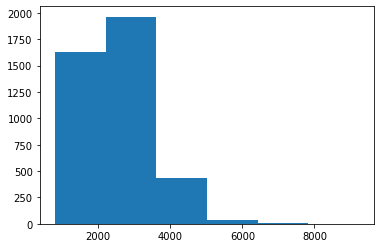

In [12]:
#EDA
#large outliners on Sq Ft
plt.hist(feature_selected['Sq Ft Total'], bins=6)
plt.show()

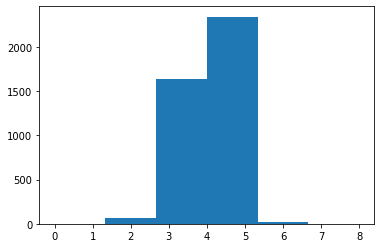

In [13]:
#EDA
#large outliners on Sq Ft
plt.hist(feature_selected['Bedrooms'], bins=6)
plt.show()

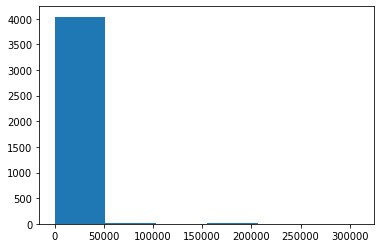

In [14]:
#EDA
#large outliners on Sq Ft
plt.hist(feature_selected['Lot Size'], bins=6)
plt.show()

In [15]:
#exclude outliners
feature_selected = feature_selected[feature_selected['Sq Ft Total'] < 5000]
feature_selected = feature_selected[feature_selected['Bedrooms'] < 6]
feature_selected = feature_selected[feature_selected['Lot Size'] < 50000]

In [16]:
#dependent variable
depVar = feature_selected['Close Price']

#independent data
indepVar = feature_selected.drop(['Close Price'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(indepVar, depVar,  test_size=.3, random_state = 0)

In [18]:
X_train.shape, X_test.shape

((2790, 30), (1197, 30))

In [19]:
y_train.shape, y_test.shape

((2790,), (1197,))

In [20]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()
modelDT = tree.DecisionTreeRegressor()

In [21]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

C:\Users\heath\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\heath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.8487642  0.82983851 0.86246943]


0.9733091151506938

In [22]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

C:\Users\heath\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\heath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\heath\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\heath\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[-0.04017384 -0.12479949 -0.0497293 ]


-0.07355476804793426

In [23]:
modelDT.fit(X_train,y_train)
print(cross_val_score(modelDT, X_train, y_train)) 
modelDT.score(X_train,y_train)

[0.74934154 0.64086387 0.79426707]


C:\Users\heath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9999347653965401

In [24]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[0.84548899 0.82818816 0.873666  ]


C:\Users\heath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8542557312993398

In [25]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.879
RMSE: 35864.080


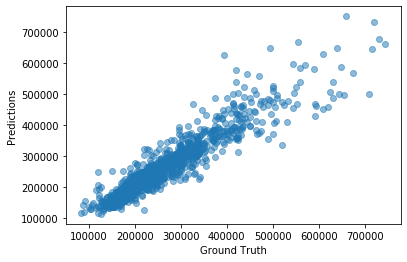

In [26]:
#plot model results
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

In [140]:
######Bring in active properties###############

rawData_pred = pd.read_csv('C:/Users/heath/Documents/Data Class/Data Science with Python/Capstone/Capstone Data/Currently Listed Homes in Cypress Fairbanks School District.csv', header =0)

###############Run same preprocessing######################

#transform all land sizes into square feet then check for missing land measurement
rawData_pred['Lot Size'] = rawData_pred['Lot Size'].replace(np.NaN, rawData_pred['Acres'] * 43560 )

#Replace fireplace number blanks with zeros
rawData_pred['Fireplaces Number'] = rawData_pred['Fireplaces Number'].replace(np.NaN, 0 )
 
#create boolean attributes for remaining odject data types
datatype_objects = rawData_pred.select_dtypes(include=[object])
X = pd.get_dummies(datatype_objects, prefix_sep='_', drop_first=True)

#drop old object datatype columns
header_obj = datatype_objects.dtypes.index
rawData_pred = rawData_pred.drop(header_obj, axis=1)

#add in new boolean columns 
processed_data_pred = pd.concat([rawData_pred, X], axis=1)

#exclude outliners
feature_selected_pred = processed_data_pred[processed_data_pred['Sq Ft Total'] < 5000]
feature_selected_pred = processed_data_pred[processed_data_pred['Bedrooms'] < 6]
feature_selected_pred = processed_data_pred[processed_data_pred['Lot Size'] < 50000]

##############Apply same feature Selection##################

#Same features as training
features = indepVar.dtypes.index
feature_selected_pred2 = feature_selected_pred[features]

#add back MLS will be used later
feature_selected_pred3 = pd.concat([feature_selected_pred['MLS Number'],feature_selected_pred2], axis=1)

#Delete rows that contain missing data for columns that remain
feature_selected_pred4 = feature_selected_pred3.dropna(axis = 0, how ='any') 
indepVar_pred = feature_selected_pred4.drop(['MLS Number'], axis=1)

##############Run data through model#####################

#prediction
predictions = modelRF.predict(indepVar_pred)
feature_selected_pred4['PREDICTED SALES PRICES'] = predictions
#output = feature_selected_pred4['MLS Number', 'PREDICTED SALES PRICES']

####################Final Output######################

#unique indentifier of listed properties along with predicted sales prices
output = feature_selected_pred4.iloc[:,[0,31]]
output

C:\Users\heath\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,MLS Number,PREDICTED SALES PRICES
0,55471663,167690.0
1,85681538,153994.9
2,18314016,127250.0
3,64956113,133300.0
4,31804725,171750.0
5,95704622,115400.0
6,63007791,115161.0
7,83869336,204210.0
8,398611,146899.0
9,52253426,134240.0
